## Safe Bike share

#### Objective 
The objective of this project is to identify bike share stations that are safe for bikers in New york.

#### Data sources
The Citi Bank share has a repository of data from 2013 to 2019. The data set can be found here:
https://www.citibikenyc.com/system-data

The NYPD also keeps a record of accidents for the year 2019. 

https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Both of these data sets have location and zip codes associated to each data point.
The longitude and latitude information will allow us to specify bike stations
that safe from accidents.

As a result Citi Bank can either move the existing unsafe stations or take measures to safeguard riders.

In [2]:
import pandas as pd
bike_pth = "D:\\Udacity\\data\\bike-share\\2013-07 - Citi Bike trip data.csv"
df_bk = pd.read_csv(bike_pth)

data_pth = "D:\\Udacity\\data"
nypd_pth =data_pth + "\\collision\\nypd-collision.csv"
collision_df = pd.read_csv(nypd_pth)

D:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print('Bike share row count: ',len(df_bk))
print('Collision row count: ',len(collision_df))

Bike share row count:  843416
Collision row count:  1558237


### Bike share EDA

In [6]:
print("Bike share date-set header:\n",df_bk.columns)

Bike share date-set header:
 Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')


##### Data Dictionary
- Trip Duration (seconds) 
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID - Unique for each station
- Station Lat/Long
- Bike ID - Unique for each bike
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

In [6]:
df_bk.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


### Collision dataset EDA

In [7]:
print("Collision date-set header:\n",collision_df.columns)

Collision date-set header:
 Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')


##### Data Dictionary
- DATE: Occurrence date of collision
- TIME: Occurrence time of collision
- BOROUGH: Borough where collision occurred
- ZIP CODE: Postal code of incident occurrence
- LATITUDE: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- LONGITUDE: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- LOCATION: Latitude , Longitude pair
- ON STREET NAME: Street on which the collision occurred
- CROSS STREET NAME: Nearest cross street to the collision
- OFF STREET NAME: Street address if known
- NUMBER OF PERSONS INJURED: Number of persons injured
- NUMBER OF PERSONS KILLED: Number of persons killed
- NUMBER OF PEDESTRIANS INJURED: Number of pedestrians injured
- NUMBER OF PEDESTRIANS KILLED: Number of pedestrians killed
- NUMBER OF CYCLIST INJURED: Number of cyclists injured 
- NUMBER OF CYCLIST KILLED: of cyclists killed
- NUMBER OF MOTORIST INJURED: of vehicle occupants injured
- NUMBER OF MOTORIST KILLED: of vehicle occupants killed
- CONTRIBUTING FACTOR VEHICLE 1: Factors contributing to the collision for designated vehicle
- CONTRIBUTING FACTOR VEHICLE 2: Factors contributing to the collision for designated vehicle
- CONTRIBUTING FACTOR VEHICLE 3: Factors contributing to the collision for designated vehicle
- CONTRIBUTING FACTOR VEHICLE 4: Factors contributing to the collision for designated vehicle
- CONTRIBUTING FACTOR VEHICLE 5: Factors contributing to the collision for designated vehicle
- COLLISION_ID: Unique record code generated by system. Primary Key.
- VEHICLE TYPE CODE 1 to 5: Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)
	

In [8]:
collision_df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/24/2019,11:53,NaN,NaN,NaN,NaN,NaN,CROSS BRONX EXPY RAMP,NaN,NaN,...,Aggressive Driving/Road Rage,NaN,NaN,NaN,4194003,Sedan,Sedan,NaN,NaN,NaN
1,08/24/2019,13:22,NaN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE LOWER,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4194562,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,08/24/2019,23:00,NaN,NaN,NaN,NaN,NaN,MEEKER AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4194211,Sedan,Motorcycle,NaN,NaN,NaN
3,08/24/2019,23:50,NaN,NaN,NaN,NaN,NaN,MERIDIAN RD,NEW YORK AVE,NaN,...,NaN,NaN,NaN,NaN,4193896,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,08/23/2019,0:12,NaN,NaN,40.825134,-73.95141,POINT (-73.95141 40.825134),BROADWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4193507,Pick-up Truck,Sedan,NaN,NaN,NaN


#### Data cleaning for collision data set
This data set is likely entered manually which is why some column have missing 
values. Since the goal is to use geo location to identify locations of interest, any null values for LATITUDE, LATITUDE and ZIPCODE were ignored for analysis.

SQL queries will be used to ignore such data.

Also, the date and time values are in sepearate columns. Using SQL these
columns were merged and recorded as timestamps in our tables.

#### Relevance of the collision data set
As shown below 200 cyclists were either injured or killed in NY. 
The collision data set can be used both for identifying unsafe and safe zones for riders.

In [14]:
cyclist_df = collision_df[
    (collision_df['NUMBER OF CYCLIST INJURED'] >0) |
    (collision_df['NUMBER OF CYCLIST KILLED'] >0)
].head(200)

print("Total Injured or killed cyclists: ",len(cyclist_df))

Total Injured or killed cyclists:  200


### Plotting points from both data sets
The following plot gives us an idea how the data points on both of these data sets overlap.

In [15]:
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiYXRoZXIyMyIsImEiOiJjazExbGNvZ2YwMXFhM2hxdnZkMGlyMXZrIn0.t1Xr46B-Obi8M15uo8lMrA"
bk = df_bk.head(200)
data = [go.Scattermapbox(
        lat=cyclist_df['LATITUDE'],
        lon=cyclist_df['LONGITUDE'],
        mode='markers',
        name="Collisions",
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=cyclist_df['ZIP CODE'],
    ),
         go.Scattermapbox(
            lat= bk['start station latitude'] ,
            lon= bk['start station longitude'],
            text = bk['start station name'],
            name="Start Station",
            mode='markers',
             marker=go.scattermapbox.Marker(
            size=5
        )
          )
        ,
         go.Scattermapbox(
            lat= bk['end station latitude'] ,
            lon= bk['end station longitude'],
            text = bk['end station name'],
            name="End station",
            mode='markers',
             marker=go.scattermapbox.Marker(
            size=3
        )
          )
       
       ]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.7128,
            lon=-74.0060
            
        ),
        pitch=0,
        zoom=10
    ),
)
from  plotly.offline import plot
from chart_studio.plotly import iplot
fig = dict(data=data, layout=layout)
plot(fig)

'temp-plot.html'

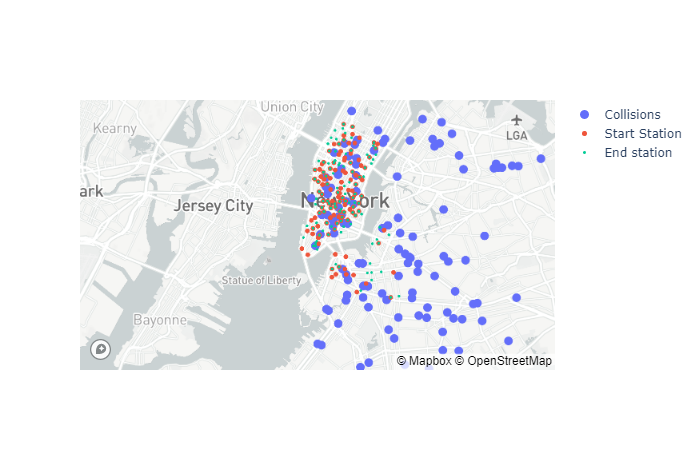

In [17]:
from IPython.core.display import Image, display
display(Image('./newplot.png'))

### Data Model Definition
Based on the analysis of the files the following data model was derived to assist in identifying safe and unsafe zones for riders.


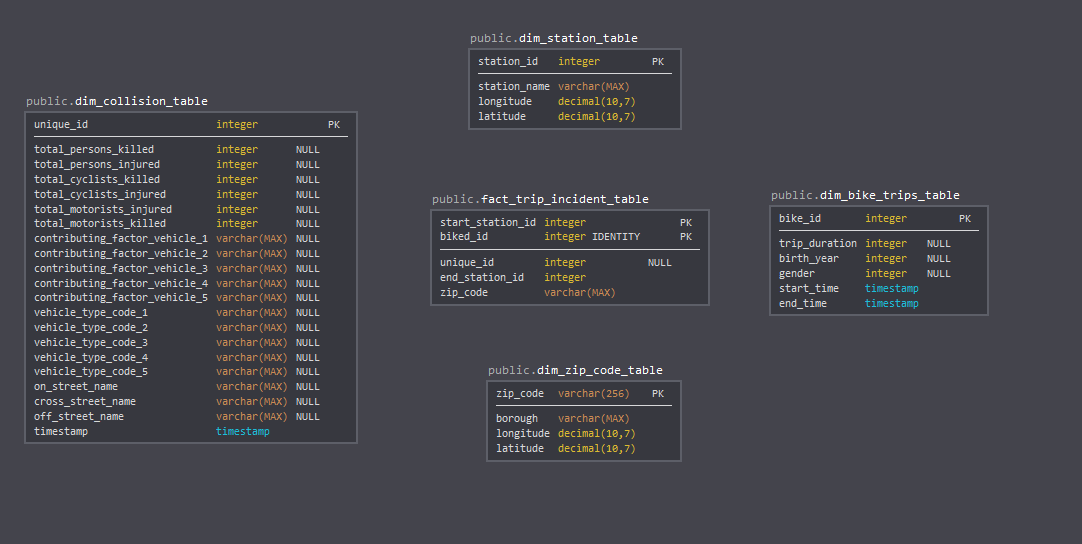

In [21]:
display(Image('./datamodel.png'))

- The fact table will allow us to query all stations that have had any collisions reported based on the unique_id. 
- We can use this fact table to see which zip codes and station ids have had accidents reported near that area.

### Building the fact table
Building the fact table was challenging because the long/lat coordinates didnot exactly match.
Hence, the zip-code in the collision data set was used to figure out the approximate location of the station in the bike share data set.
This was done using the Harversince distance metric. <br/>
For each bike trip the start and end long/lat was extracted from the bike share data set. <br/>
Then for each zip-code in the collision the long/lat was used to measure the distance between bike station.
If the distance was less than 100 meters the collision was considered as an accindent within the 100meters radius.
If the distances was great than 100 meters, then effectively no incident took place near the station. Such a station would be considered safe for riders. <br/>

This calculation is done in the HarverSine class.

### Queries that can be run
The following query can be run to identify bike trips and stations that were near previous accidents

``` SELECT * FROM trip_incident_table WHERE unique_id IS NOT NULL;```

Once the unique_ids have been identified the ```dim_collision_table``` can be used to identify if these accidents involved cyclists.
The ```dim_zip_code_table``` can be used to identify the locations of the collisions as well.


### Spark and Airflow
Spark can be used to build the fact table really quickly. Without the fact table is generated very slowly.
Since the data is coming from different sources the data pipeline is very complex for which airflow can come in handy. <br/>
Airflow can also be used to scheduled to initiate a DAG run at 7am on a daily basis.

### Scenarios
- if the data was increased by 100x: 
In this scenario we would definitely need to leverage Spark to build the data model. Otherwise, the computation of the HarverSine distance will be very slow. 

- If the pipelines were run on a daily basis by 7am. 
This can be done by a cron schedule on a machine based on the currenty architecuture. However, Airflow can also be used to do this.

- If the database needed to be accessed by 100+ people.
In order for everyone to have access to the most upto date information, the ETL pipline needs to run really quickly and frequently. For that we can use Apache Cassandra so that all stake holders have the minimum latency and minimum downtown.
Spark can also be used to process the ETL more efficiently 